## Introduction

This notebook is meant to guide you with few introductory steps with MNE in order to help you start you future analyses !

Overall this notebook will address :

    1. Importing data
    2. Using a montage from MNE Built-ins and adding it to the data
    3. Visualize the previously cleaned data
    4. Segmentation of continuous data
    5. Plotting of PSD and topomaps
    
*This markdown is organized by a table of content which is one of many [extensions](http://localhost:8888/nbextensions/?nbextension=toc2/main) you can get for jupyter notebook following this github [page](https://github.com/ipython-contrib/jupyter_contrib_nbextensions). Installing these prior to consulting this document will help with the flow of the documentation.*

First step is always to import the needed modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import os
import mne
import pytest
import os.path as op
from mne import channels
from mne import io, read_proj, read_selection
from mne.time_frequency import tfr_morlet
from mne.time_frequency import psd_welch
from mne.time_frequency import psd_multitaper
from mne.channels.montage import get_builtin_montages
from ipywidgets import interact, interactive, fixed, interact_manual
from scipy import io
print(__doc__)

Automatically created module for IPython interactive environment


## Importing data

* MNE offers a wide variety of format for [importing data](https://mne.tools/stable/auto_tutorials/io/plot_20_reading_eeg_data.html#sphx-glr-auto-tutorials-io-plot-20-reading-eeg-data-py)


* Theoritically you can read either .mff files directly from the EGI system or convert into .set files ([reference link](https://mne.tools/stable/auto_tutorials/io/plot_20_reading_eeg_data.html#id8))  

You can refer to [this function](https://mne.tools/dev/generated/mne.io.read_raw_egi.html#mne.io.read_raw_egi#mne.io.read_raw_edf) for a tutorial on .mff import on MNE, or this [function](https://mne.tools/dev/generated/mne.io.read_raw_eeglab.html#mne.io.read_raw_eeglab) for .set files 


In [2]:
#load egi mff
#https://mne.tools/dev/generated/mne.io.read_raw_egi.html#mne.io.read_raw_egi
raw_mff = mne.io.read_raw_egi('Data/TACS01_day1_preeeg.mff',eog=['EOG'],preload=True)

Reading EGI MFF Header from /home/bea/Bureau/pilot_tACS/Data/TACS01_day1_preeeg.mff...
    Reading events ...
    Assembling measurement info ...
Reading 0 ... 322141  =      0.000 ...   322.141 secs...


In [3]:
raw_set = mne.io.read_raw_eeglab('Data/sub-TACS01_ses-01_task-pre_eeg.set',eog=['EOG'],preload=True)


Reading /home/bea/Bureau/pilot_tACS/Data/sub-TACS01_ses-01_task-pre_eeg.fdt
Reading 0 ... 322141  =      0.000 ...   322.141 secs...


*preload is necessary otherwise the data is not preloaded into computer RAM; that is normal behavior when preload=False (which is the default). Either specify preload=True when reading the file, or use the Raw.preload() method after reading the file.*

### Printing basic info about imported data

Printing the Raw object displays some basic information like the total number of channels, the number of time points at which the data were sampled, total duration, and the approximate size in memory. See [this](https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw) to get more information.

Most of the fields of raw.info reflect metadata recorded at acquisition time, and should not be changed by the user. There are a few exceptions (such as raw.info['bads'] and raw.info['projs']), but in most cases there are dedicated MNE-Python functions or methods to update the Info object safely (such as add_proj() to update raw.info['projs']).([**based on this reference**](https://mne.tools/stable/auto_tutorials/raw/plot_10_raw_overview.html#sphx-glr-auto-tutorials-raw-plot-10-raw-overview-py)).


In [4]:
print(raw_mff)
print(raw_mff.info)

<RawMff | signal1.bin, 129 x 322142 (322.1 s), ~317.2 MB, data loaded>
<Info | 8 non-empty values
 bads: []
 ch_names: E1, E2, E3, E4, E5, E6, E7, E8, E9, E10, E11, E12, E13, E14, ...
 chs: 129 EEG
 custom_ref_applied: False
 dig: 133 items (3 Cardinal, 130 EEG)
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: 2021-08-01 20:16:24 UTC
 nchan: 129
 projs: []
 sfreq: 1000.0 Hz
>


In [5]:
print(raw_set)
print(raw_set.info)

<RawEEGLAB | sub-TACS01_ses-01_task-pre_eeg.fdt, 129 x 322142 (322.1 s), ~317.2 MB, data loaded>
<Info | 8 non-empty values
 bads: []
 ch_names: E1, E2, E3, E4, E5, E6, E7, E8, E9, E10, E11, E12, E13, E14, ...
 chs: 129 EEG
 custom_ref_applied: False
 dig: 129 items (129 EEG)
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 nchan: 129
 projs: []
 sfreq: 1000.0 Hz
>


### Visualize montage uploaded

Following this [tutorial](https://mne.tools/stable/auto_tutorials/intro/plot_40_sensor_locations.html)

In [6]:
print(raw_mff.plot_sensors(kind='3d', ch_type='eeg', ch_groups='position'))

<IPython.core.display.Javascript object>

Figure(640x640)


In [7]:
montage_dir = os.path.join(os.path.dirname(mne.__file__),
                           'channels', 'data', 'montages')
print('\nBUILT-IN MONTAGE FILES')
print('======================')
print(sorted(os.listdir(montage_dir)))


BUILT-IN MONTAGE FILES
['EGI_256.csd', 'GSN-HydroCel-128.sfp', 'GSN-HydroCel-129.sfp', 'GSN-HydroCel-256.sfp', 'GSN-HydroCel-257.sfp', 'GSN-HydroCel-32.sfp', 'GSN-HydroCel-64_1.0.sfp', 'GSN-HydroCel-65_1.0.sfp', 'artinis-brite23.elc', 'artinis-octamon.elc', 'biosemi128.txt', 'biosemi16.txt', 'biosemi160.txt', 'biosemi256.txt', 'biosemi32.txt', 'biosemi64.txt', 'easycap-M1.txt', 'easycap-M10.txt', 'mgh60.elc', 'mgh70.elc', 'standard_1005.elc', 'standard_1020.elc', 'standard_alphabetic.elc', 'standard_postfixed.elc', 'standard_prefixed.elc', 'standard_primed.elc']


In [8]:
montage =  mne.channels.make_standard_montage('GSN-HydroCel-129')
print(montage)

<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 129 channels>


In [9]:
fig = montage.plot(kind='3d')
fig.gca().view_init(azim=70, elev=15)
print(montage.plot(kind='topomap', show_names=True))

Creating RawArray with float64 data, n_channels=129, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


<IPython.core.display.Javascript object>

Creating RawArray with float64 data, n_channels=129, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


<IPython.core.display.Javascript object>

Figure(640x640)


In [10]:
fig = plt.figure()
ax2d = fig.add_subplot(121)
print(raw_mff.plot_sensors(ch_type='eeg', axes=ax2d))

<IPython.core.display.Javascript object>

Figure(640x480)


## Filtering

[Documentation](https://mne.tools/stable/generated/mne.filter.filter_data.html)

### Remove non-brain electrodes

[Documentation](https://mne.tools/stable/auto_tutorials/raw/10_raw_overview.html)

In [11]:
non_brain = ['E127','E126','E17','E21','E14','E25','E8', 'E128','E125','E43','E120','E48','E119','E49','E113','E81','E73','E88','E68','E94','E63', 'E99','E56','E107']


In [12]:
raw_brainonly = raw_mff.drop_channels(non_brain)

In [15]:
raw_brainonly

<RawMff | signal1.bin, 105 x 322142 (322.1 s), ~258.2 MB, data loaded>

In [13]:
#channels = mne.pick_channels(raw_mff.info['ch_names'],include=[], exclude=non_brain, ordered = True)

In [27]:
data_filtered = raw_brainonly.filter(l_freq=0.1, h_freq=50)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 33001 samples (33.001 sec)



In [28]:
# eeg_filtered = mne.filter.filter_data(raw_mff, 1000, 0.1, 50, picks = channels)

[Apply a notch filter](https://mne.tools/stable/generated/mne.filter.notch_filter.html?highlight=notch#mne.filter.notch_filter)

<IPython.core.display.Javascript object>


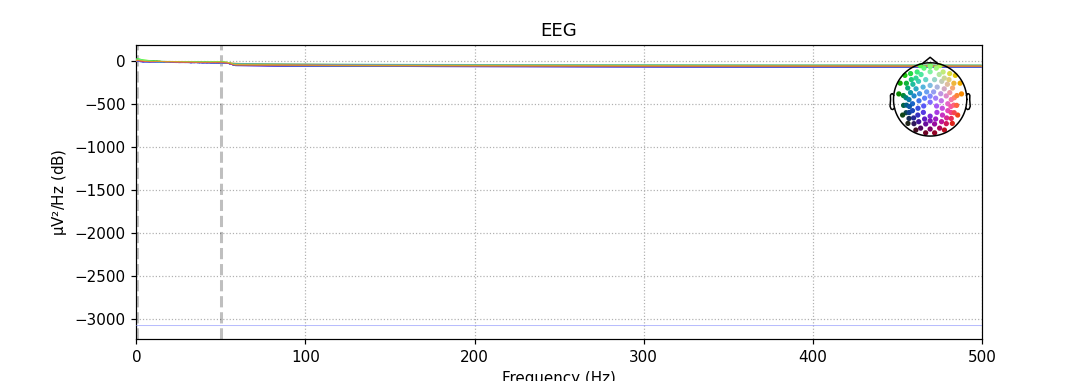

Effective window size : 2.048 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 6601 samples (6.601 sec)



<ipython-input-33-435bacb96803>:1: UserWarning: Infinite value in PSD for channel E129.
These channels might be dead.
  data_filtered.plot_psd(tmax=60., average=False)


<RawMff | signal1.bin, 105 x 322142 (322.1 s), ~258.2 MB, data loaded>

In [33]:
data_filtered.plot_psd(tmax=60., average=False)
data_filtered.notch_filter(np.arange(60, 181, 60), fir_design='firwin')

## Re-reference EEG

Refer to this [documentation](https://mne.tools/stable/generated/mne.set_eeg_reference.html)

EEG channel type selected for re-referencing
Applying a custom EEG reference.


<IPython.core.display.Javascript object>


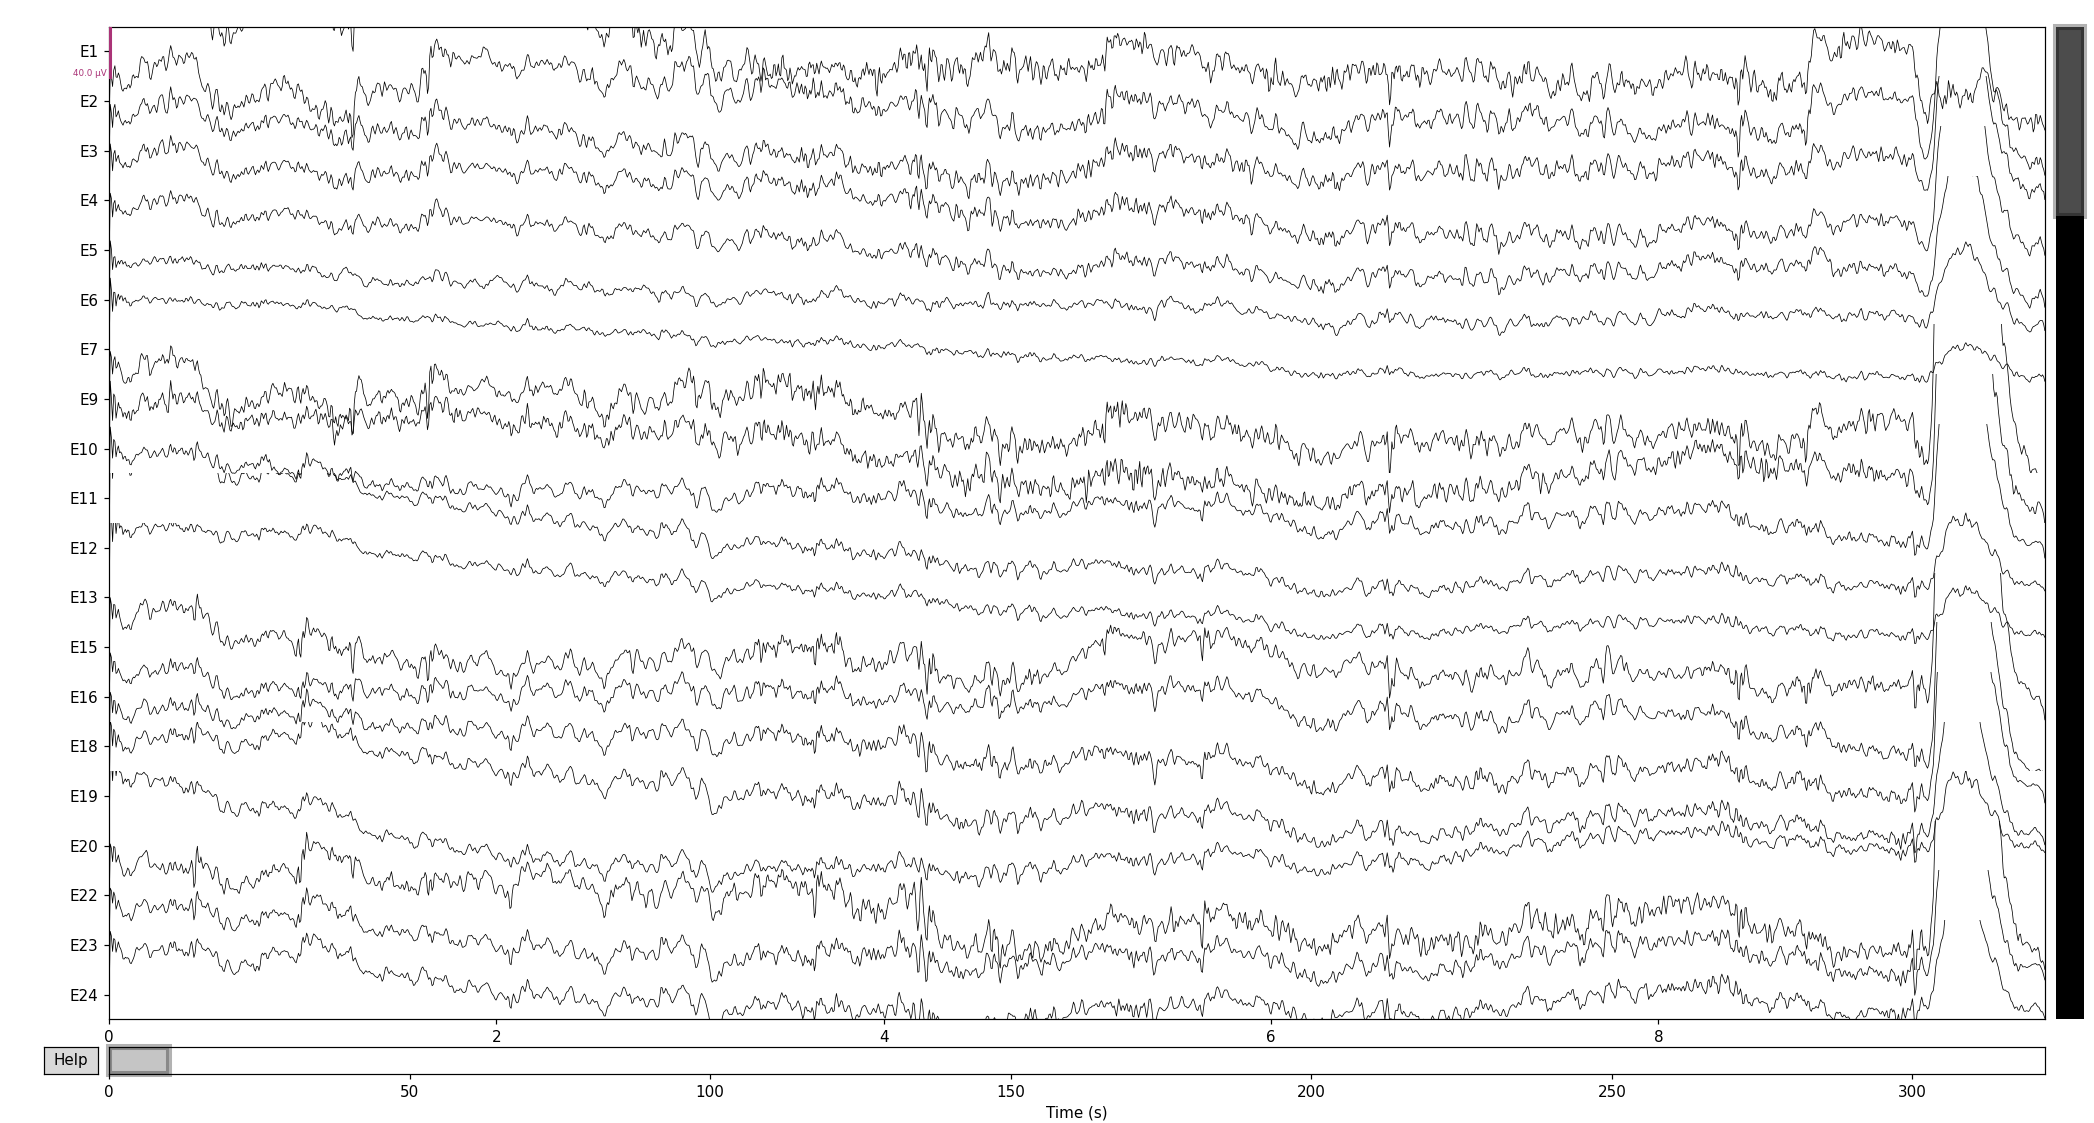

<IPython.core.display.Javascript object>


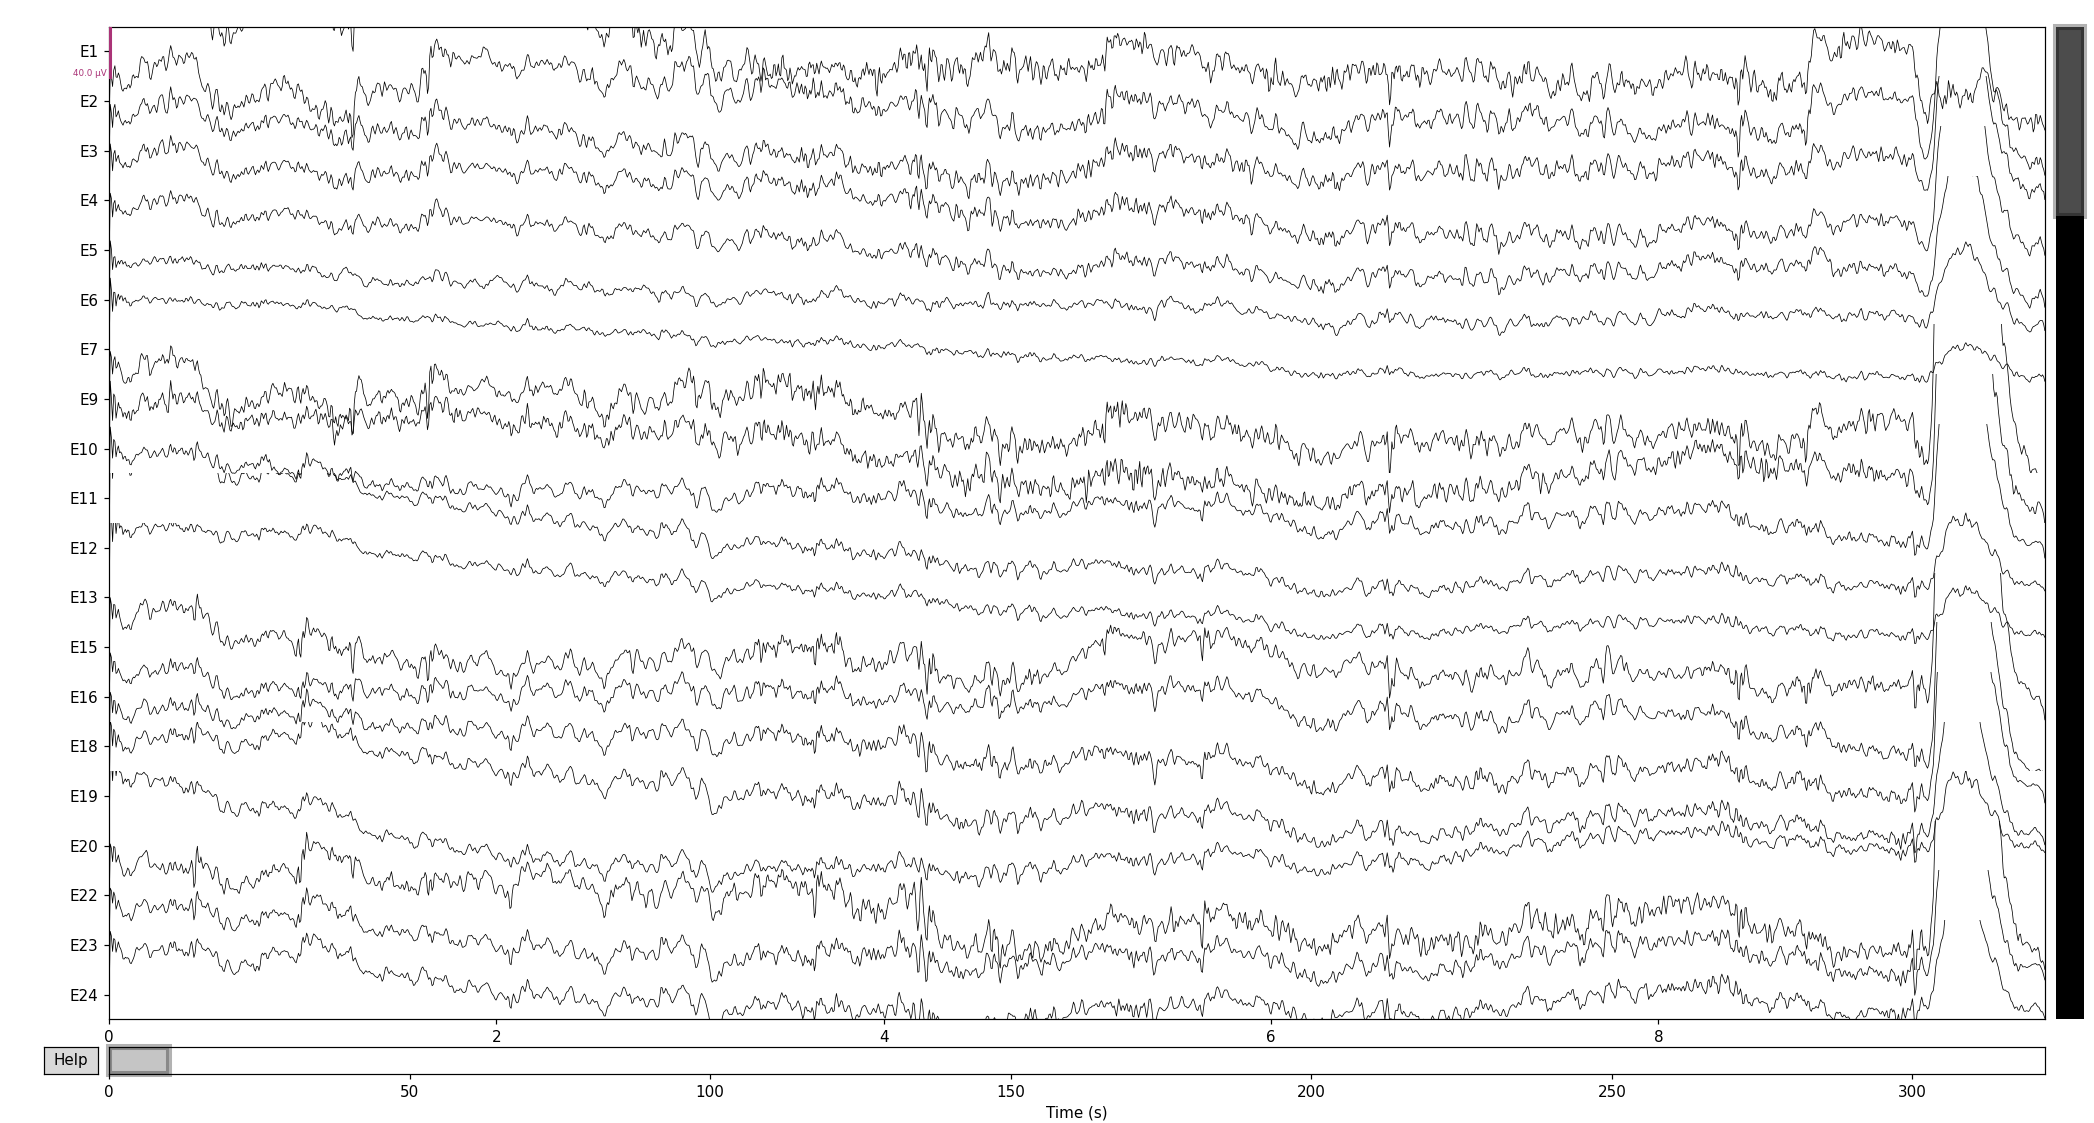

In [35]:
data_avg = data_filtered.set_eeg_reference(ref_channels=['E129'])
data_avg.plot()

In [20]:
# use the average of all channels as reference
# raw_avg_ref = raw_brainonly.copy().set_eeg_reference(ref_channels='average')
# raw_avg_ref.plot()

In [21]:
# raw_avg = raw_brainonly.set_eeg_reference('average', projection=True)
# print(raw_avg.info['projs'])

Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
[<Projection | Average EEG reference, active : False, n_channels : 105>]


<IPython.core.display.Javascript object>


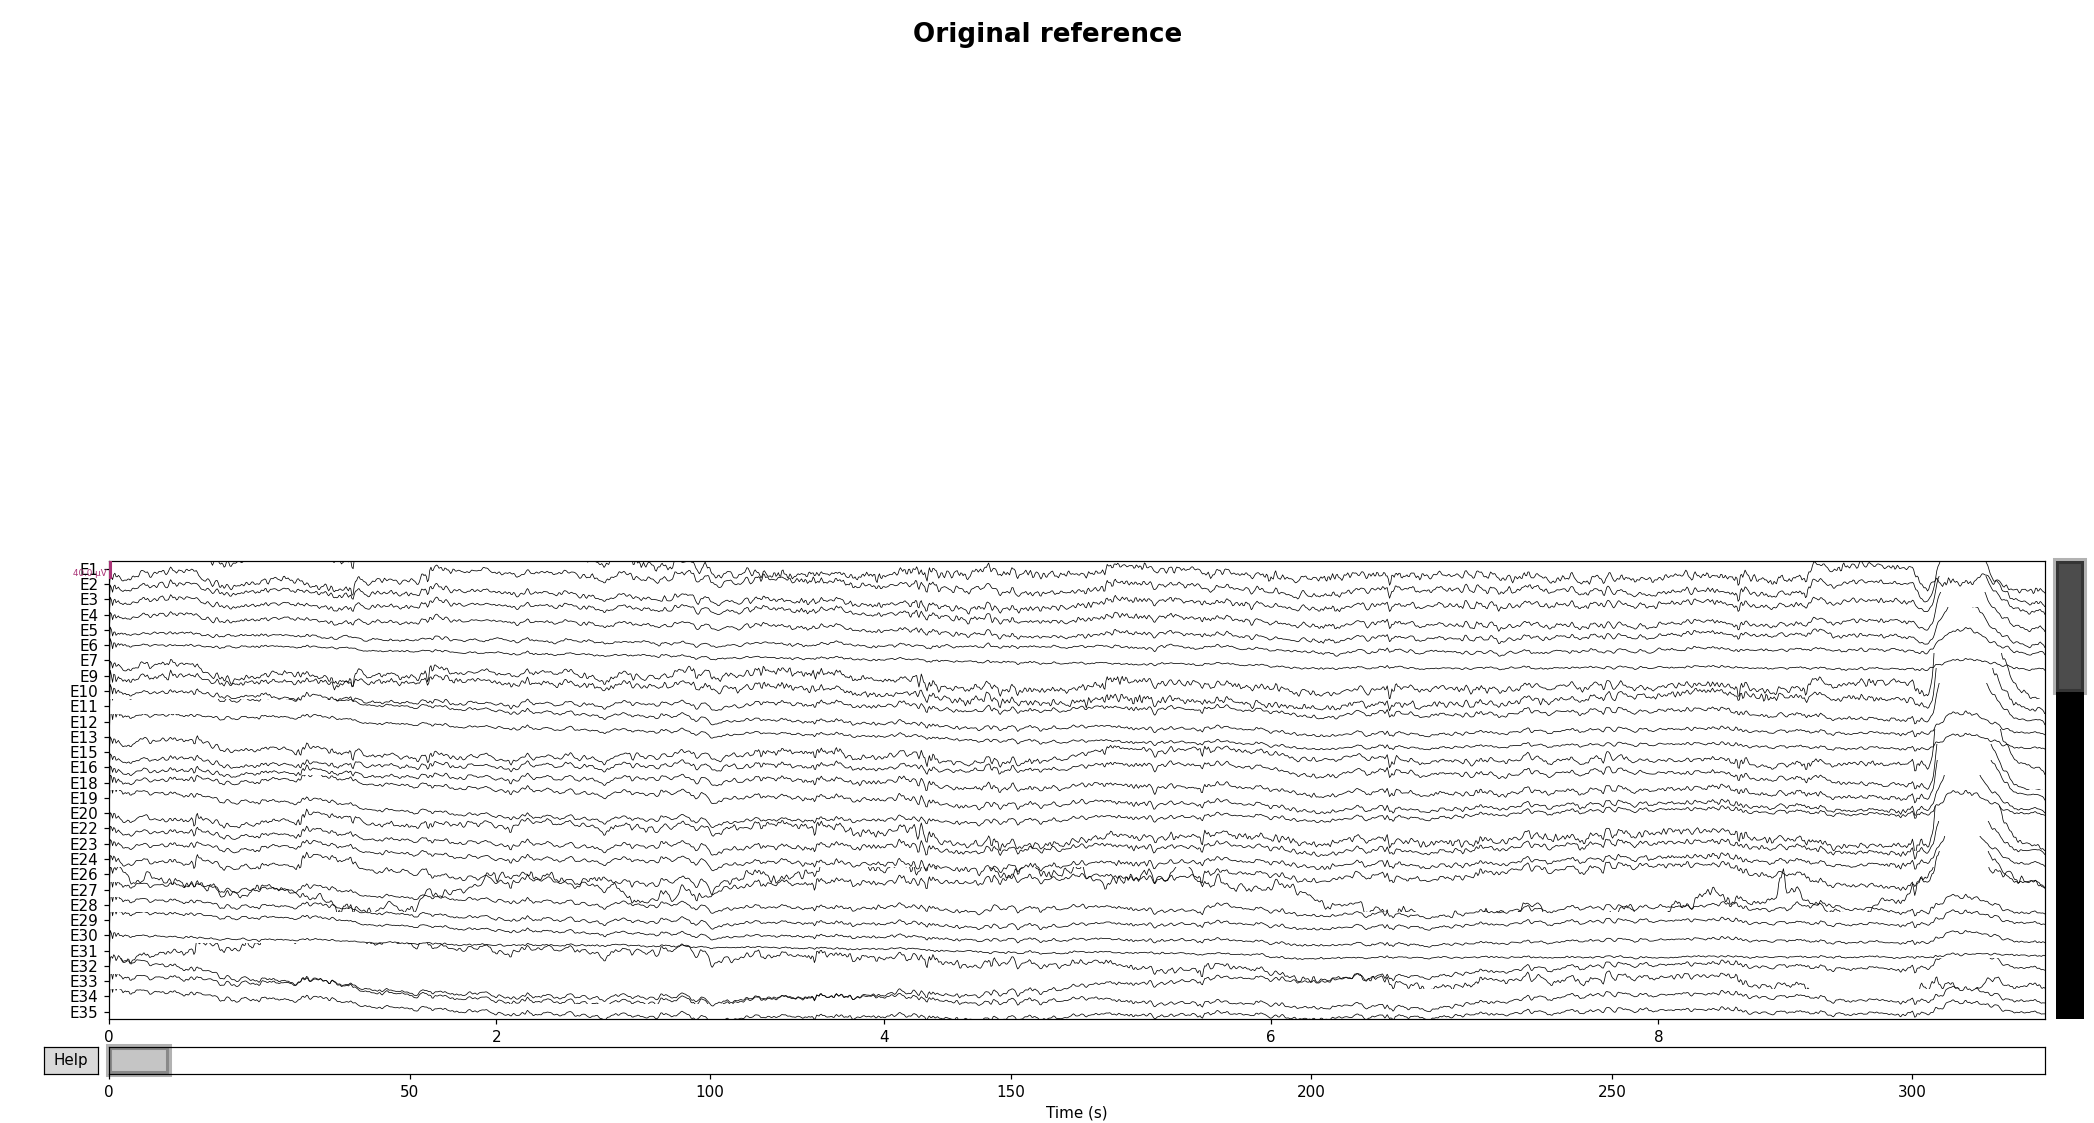

<IPython.core.display.Javascript object>


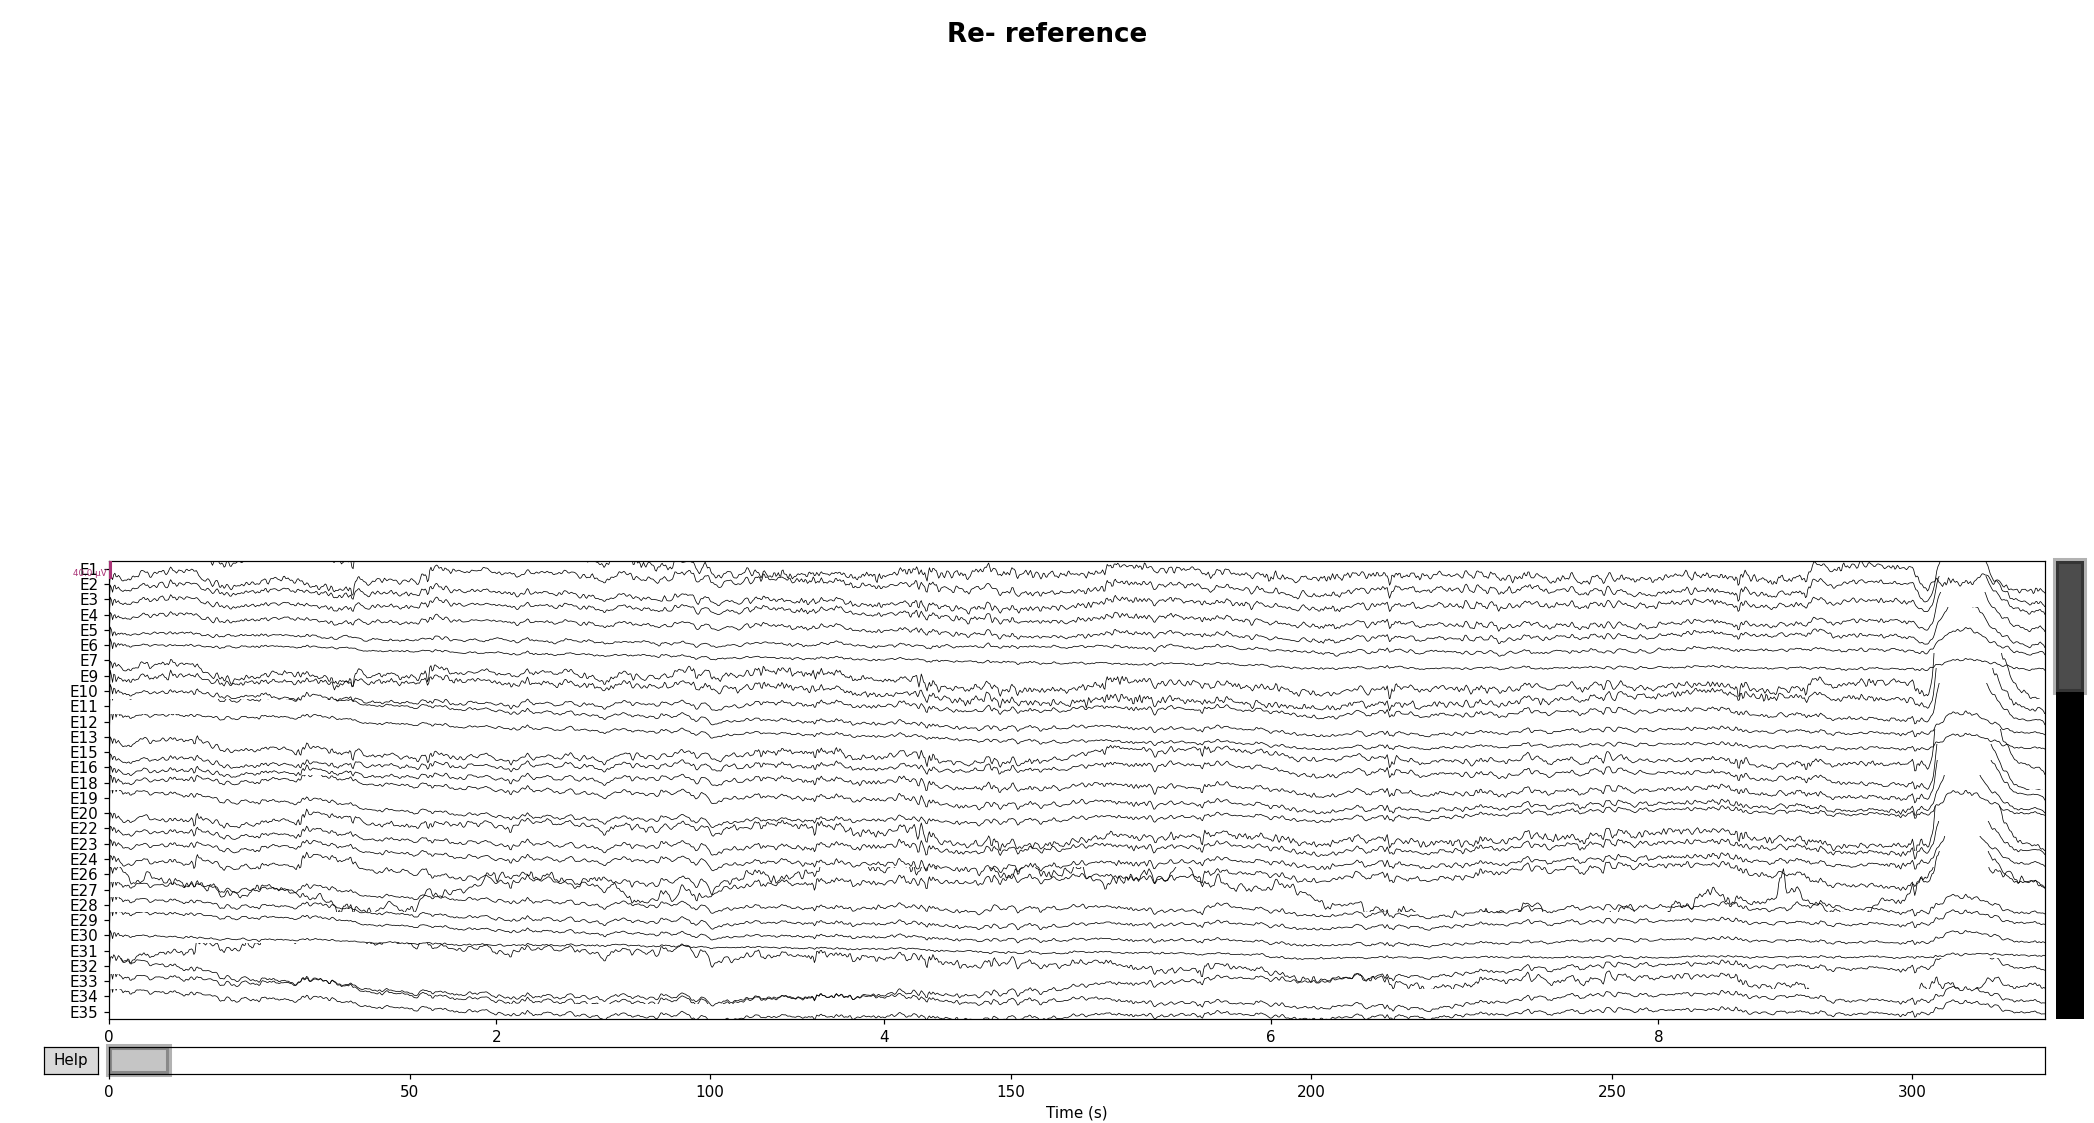

In [41]:
for title, proj in zip(['Original', 'Re-'], [False, True]):
    fig = data_avg.plot(proj=proj, n_channels=30)
    # make room for title
    fig.subplots_adjust(top=0.5,)
    fig.suptitle('{} reference'.format(title), size= 'xx-large', weight='bold')

## Visualize the cleaned EEG data

The plot() method of Raw objects provides a versatile interface for exploring continuous data. For interactive viewing and data quality checking, it can be called with no additional parameters:

In [ ]:
raw_mff.plot()

Many different parameters can be chosen to format psd plot. Refer to this [tutorial](https://mne.tools/dev/auto_examples/time_frequency/plot_compute_raw_data_spectrum.html).

In [ ]:
print(raw_mff.plot_psd(average=True))

In [ ]:
print(emerge5.plot_psd(area_mode='range', tmax=10.0, show=False, average=True)) # many different parameters are offered

## Segmentation

### Creating Epoched data from continuous data


If no experimental events are included in the recording (resting-state data for example), an event array of equally spaced events can be [generated](https://mne.tools/dev/generated/mne.make_fixed_length_events.html) . This is the case of this data. 
Refer to [this](https://mne.tools/stable/auto_tutorials/epochs/plot_10_epochs_overview.html#sphx-glr-auto-tutorials-epochs-plot-10-epochs-overview-py) when working with events.

In [ ]:
new_events = mne.make_fixed_length_events(emerge5, start=5, stop=50, duration=2.5, overlap=0)

In [ ]:
epochs = mne.Epochs(emerge5, new_events, tmin=-0.2, tmax=0.5, preload=True)

Plotting epochs as time series

In [ ]:
print(epochs.plot(events=new_events))

## Frequency analysis

### Plotting PSD

Plotting the power spectrum of Epochs. 

In [ ]:
print(epochs.plot_psd(picks='eeg'))

Plotting Epochs as an image map

In [ ]:
print(epochs.plot_image(picks='eeg', combine='mean'))

[reference](https://mne.tools/stable/auto_tutorials/time-freq/plot_sensors_time_frequency.html#sphx-glr-auto-tutorials-time-freq-plot-sensors-time-frequency-py)

In [ ]:
#check out all channel types by averaging across epochs.
print(epochs.plot_psd(fmin=4., fmax=30., average=True))

Now let’s take a look at the spatial distributions of the PSD.

### Plotting via topomaps

In [ ]:
print(epochs.plot_psd_topomap(ch_type='eeg', normalize=True))

Alternatively, you can also create PSDs from Epochs objects with functions that start with psd_ such as mne.time_frequency.psd_multitaper() and mne.time_frequency.psd_welch().
https://mne.tools/stable/auto_tutorials/time-freq/plot_sensors_time_frequency.html#sphx-glr-auto-tutorials-time-freq-plot-sensors-time-frequency-py


### Computing psd welch :  mne.time_frequency.psd_welch() 

In [ ]:
# Estimate PSDs based on "mean" and "median" averaging for comparison.
kwargs = dict(fmin=2, fmax=40, n_jobs=1)
psds_welch_mean, freqs_mean = psd_welch(epochs, average='mean', **kwargs)
psds_welch_median, freqs_median = psd_welch(epochs, average='median', **kwargs)

# Convert power to dB scale.
psds_welch_mean = 10 * np.log10(psds_welch_mean)
psds_welch_median = 10 * np.log10(psds_welch_median)

## We will only plot the PSD for a single sensor in the first epoch.
ch_name = 'E15'
ch_idx = epochs.info['ch_names'].index(ch_name)
epo_idx = 0

_, ax = plt.subplots()
ax.plot(freqs_mean, psds_welch_mean[epo_idx, ch_idx, :], color='k',
        ls='-', label='mean of segments')
ax.plot(freqs_median, psds_welch_median[epo_idx, ch_idx, :], color='k',
        ls='--', label='median of segments')

ax.set(title='Welch PSD ({}, Epoch {})'.format(ch_name, epo_idx),
       xlabel='Frequency (Hz)', ylabel='Power Spectral Density (dB)')
ax.legend(loc='upper right')
plt.show()

## Conclusion

**MNE**: This brief overview of MNE for EEG data analysis was all based on this [documentation](https://mne.tools/stable/) available online. So many more [tutorials](https://mne.tools/stable/auto_tutorials/index.html) are offered on various subjects such as source modeling, statistical analysis of sensor data and source estimates, machine learning, simulation. MNE also offers sample datasets to practice with. 

**Github**: 
If you encounter any type of bug, have questions or want to deepen your understanding of MNE tools go checkout their [github page](https://github.com/mne-tools/mne-python). From there you can create [issues](https://docs.github.com/en/github/managing-your-work-on-github/about-issues) or consult previous discussions to resolve your problems. Responses come very fast and are definitely a great help !

First important thing to do before starting your [jupyter notebook](https://jupyter.org/) is to create a [github account](https://docs.github.com/en/github/getting-started-with-github).  GitHub is one of the biggest community of developers to discover, share, and build better software. It offers an open source version control system that helps manage and store revisions of projects, which is mandatory for quality coding. The other important thing is to subscribe to the [GitHub Student Developer Pack](https://education.github.com/) put in place to give students free access to the best developer tools in one place so they can learn by doing. 

**Python and more**:
Part of this package is some free access to programming classes such as python which will be of great help prior to starting with MNE (see [datacamp](https://www.datacamp.com/), [one month](https://onemonth.com/), and others). Additionally a great deal of python documentation is offered online (for free) and the community is very reponsive and helpful. Google a coding error and you'll see !

So many more tools are offered so go check it out. Don't hesitate to ask your questions via issues or enhance via pull requests on the Example-Analysis repository!